# Image Classification with Convolutional Neural Networks

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l04c01_image_classification_with_cnns.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l04c01_image_classification_with_cnns.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this tutorial, we'll build and train a neural network to classify images of clothing, like sneakers and shirts.

It's okay if you don't understand everything. This is a fast-paced overview of a complete TensorFlow program, with explanations along the way. The goal is to get the general sense of a TensorFlow project, not to catch every detail.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

## Install and import dependencies

We'll need [TensorFlow Datasets](https://www.tensorflow.org/datasets/), an API that simplifies downloading and accessing datasets, and provides several sample datasets to work with. We're also using a few helper libraries.

In [43]:
import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import os
import pathlib as path
from tensorflow.keras.preprocessing import image


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 $\times$ 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, using the [Datasets](https://www.tensorflow.org/datasets) API:

In [46]:
print(os.getcwd())
import os
for dirname, _, filenames in os.walk('./dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\USER\Desktop\tenserflow_udacity
./dataset/Acacia\IMG_6348.JPG
./dataset/Acacia\IMG_6349.JPG
./dataset/Acacia\IMG_6350.JPG
./dataset/Acacia\IMG_6351.JPG
./dataset/Acacia\IMG_6352.JPG
./dataset/Acacia\IMG_6353.JPG
./dataset/Acacia\IMG_6354.JPG
./dataset/Acacia\IMG_6355.JPG
./dataset/Acacia\IMG_6356.JPG
./dataset/Acacia\IMG_6357.JPG
./dataset/Acacia\IMG_6358.JPG
./dataset/Acacia\IMG_6359.JPG
./dataset/Acacia\IMG_6360.JPG
./dataset/Acacia\IMG_6361.JPG
./dataset/Acacia\IMG_6362.JPG
./dataset/Acacia\IMG_6363.JPG
./dataset/Acacia\IMG_6364.JPG
./dataset/Acacia\IMG_6365.JPG
./dataset/Acacia\IMG_6366.JPG
./dataset/Acacia\IMG_6367.JPG
./dataset/Acacia\IMG_6368.JPG
./dataset/Acacia\IMG_6369.JPG
./dataset/Acacia\IMG_6370.JPG
./dataset/Acacia\IMG_6371.JPG
./dataset/Acacia\IMG_6372.JPG
./dataset/Acacia\IMG_6373.JPG
./dataset/Acacia\IMG_6374.JPG
./dataset/Acacia\IMG_6375.JPG
./dataset/Acacia\IMG_6376.JPG
./dataset/Acacia\IMG_6377.JPG
./dataset/Acacia\IMG_6378.JPG
./dataset/Acacia\IMG_6379.JPG

./dataset/Khaya senegalensis\IMG_4676.JPG
./dataset/Khaya senegalensis\IMG_4677.JPG
./dataset/Khaya senegalensis\IMG_4678.JPG
./dataset/Khaya senegalensis\IMG_4679.JPG
./dataset/Khaya senegalensis\IMG_4680.JPG
./dataset/Khaya senegalensis\IMG_4681.JPG
./dataset/Khaya senegalensis\IMG_4682.JPG
./dataset/Khaya senegalensis\IMG_4683.JPG
./dataset/Khaya senegalensis\IMG_4684.JPG
./dataset/Khaya senegalensis\IMG_4685.JPG
./dataset/Khaya senegalensis\IMG_4686.JPG
./dataset/Khaya senegalensis\IMG_4687.JPG
./dataset/Khaya senegalensis\IMG_4688.JPG
./dataset/Khaya senegalensis\IMG_4689.JPG
./dataset/Khaya senegalensis\IMG_4690.JPG
./dataset/Khaya senegalensis\IMG_4691.JPG
./dataset/Khaya senegalensis\IMG_4692.JPG
./dataset/Khaya senegalensis\IMG_4693.JPG
./dataset/Khaya senegalensis\IMG_4694.JPG
./dataset/Khaya senegalensis\IMG_4695.JPG
./dataset/Khaya senegalensis\IMG_4696.JPG
./dataset/Khaya senegalensis\IMG_4697.JPG
./dataset/Khaya senegalensis\IMG_4698.JPG
./dataset/Khaya senegalensis\IMG_4

In [72]:
# dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
# train_dataset, test_dataset = dataset['train'], dataset['test']



image_data = []
labels = []
counts=[]
target=[]
labels_dictionnary = {}
#optional 
image_paths=[]
i =0
for dirname,_,filenames in os.walk('./dataset/') :

    label = str(dirname).split("/")[-1]
    if(label !=''):
        labels.append(label)
        labels_dictionnary[label] =i
        i+=1
images_number = 0 
for dirname,_,filenames in os.walk('./dataset/') :

    label = str(dirname).split("/")[-1]
    if(label !=''):
        s= 0
        for img in filenames:
            ch = "./dataset/{}/{}".format(label , img)
            s+=1
            i = image.load_img(ch , target_size=(303,404))
            img_array = image.img_to_array(i)
            image_data.append(img_array)
            target.append(labels_dictionnary[label])
            
        print("la classe {} contient ce nombe {} de image ".format(label , s))
        images_number += s 

print(" le vecteur target !")
    
print(target)
    
        

la classe Acacia contient ce nombe 102 de image 
la classe Adenanthera microsperma contient ce nombe 80 de image 
la classe Adenium species contient ce nombe 144 de image 
la classe Anacardium occidentale contient ce nombe 239 de image 
la classe Annona squamosa contient ce nombe 105 de image 
la classe Artocarpus altilis contient ce nombe 104 de image 
la classe Artocarpus heterophyllus contient ce nombe 138 de image 
la classe Barringtonia acutangula contient ce nombe 102 de image 
la classe Cananga odorata contient ce nombe 101 de image 
la classe Carica papaya contient ce nombe 207 de image 
la classe Casuarina equisetifolia contient ce nombe 97 de image 
la classe Cedrus contient ce nombe 93 de image 
la classe Chrysophyllum cainino contient ce nombe 111 de image 
la classe Citrus aurantiifolia contient ce nombe 108 de image 
la classe Citrus grandis contient ce nombe 84 de image 
la classe Cocos nucifera contient ce nombe 110 de image 
la classe Dalbergia oliveri contient ce nomb

#Data visualiation :

In [92]:
x=np.array(image_data)
y = np.array(target)

In [93]:
print(x.shape)
y.shape

(5578, 303, 404, 3)


(5578,)

In [94]:
print(labels_dictionnary)
print(target)
print(labels)

{'Acacia': 0, 'Adenanthera microsperma': 1, 'Adenium species': 2, 'Anacardium occidentale': 3, 'Annona squamosa': 4, 'Artocarpus altilis': 5, 'Artocarpus heterophyllus': 6, 'Barringtonia acutangula': 7, 'Cananga odorata': 8, 'Carica papaya': 9, 'Casuarina equisetifolia': 10, 'Cedrus': 11, 'Chrysophyllum cainino': 12, 'Citrus aurantiifolia': 13, 'Citrus grandis': 14, 'Cocos nucifera': 15, 'Dalbergia oliveri': 16, 'Delonix regia': 17, 'Dipterocarpus alatus': 18, 'Erythrina fusca': 19, 'Eucalyptus': 20, 'Ficus microcarpa': 21, 'Ficus racemosa': 22, 'Gmelina arborea Roxb': 23, 'Hevea brasiliensis': 24, 'Hopea': 25, 'Khaya senegalensis': 26, 'Khaya senegalensis A.Juss': 27, 'Lagerstroemia speciosa': 28, 'Magnolia alba': 29, 'Mangifera': 30, 'Melaleuca': 31, 'Melia azedarach': 32, 'Musa': 33, 'Nephelium lappaceum': 34, 'Persea': 35, 'Polyalthia longifolia': 36, 'Prunnus': 37, 'Prunus salicina': 38, 'Psidium guajava': 39, 'Pterocarpus macrocarpus': 40, 'Senna siamea': 41, 'Spondias mombin L':

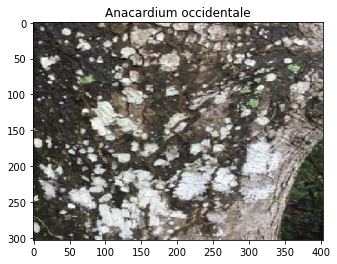

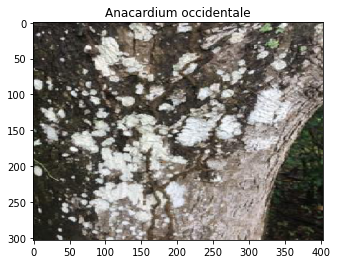

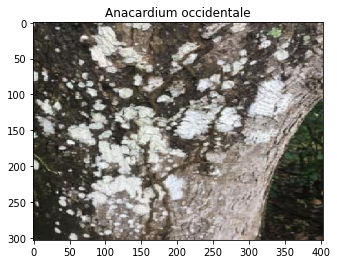

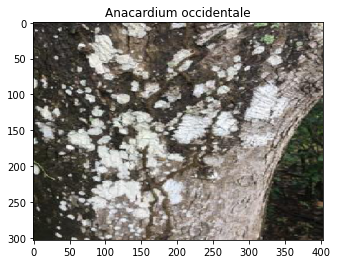

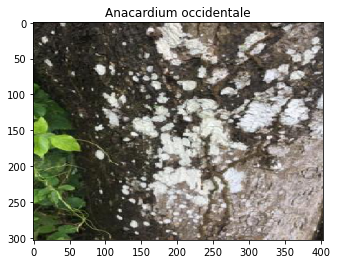

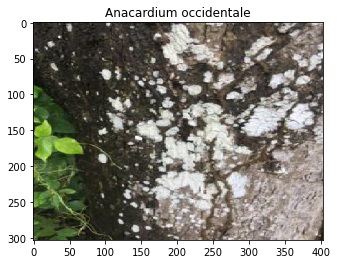

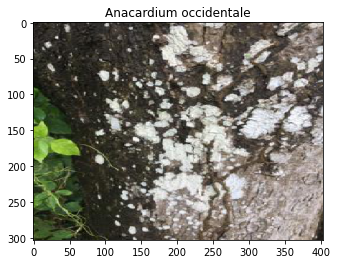

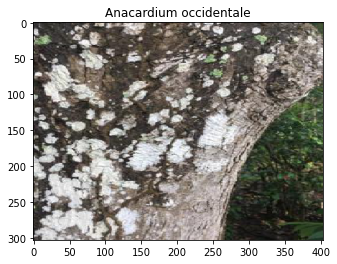

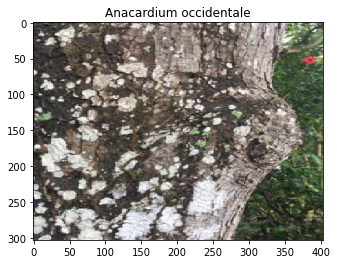

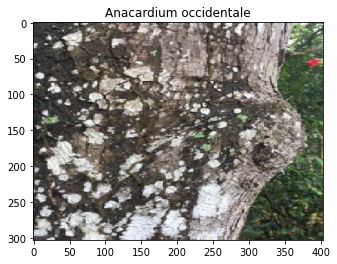

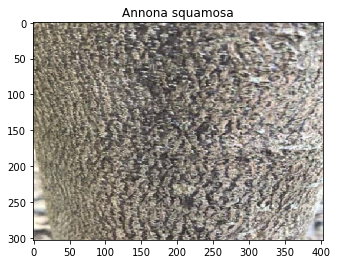

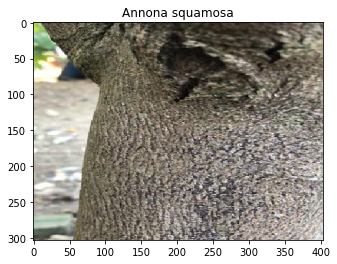

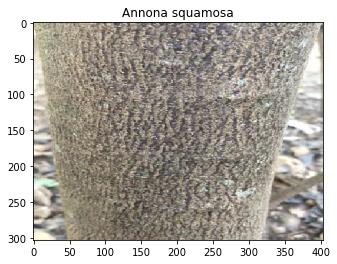

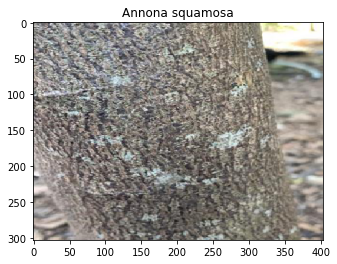

In [95]:
def affiche (img, label) : 
    plt.title(label)
    plt.imshow(img/255.0)
    plt.show()
    
for i in range(555,569): 
    affiche(x[i] , labels[y[i]])

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, and 10000 images in the test set:

In [88]:
# def normalize(images):
#   images = tf.cast(images, tf.float32)
#   images /= 255
#   return images
# x = normalize(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

## Preprocess the data

The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

### Explore the processed data

Let's plot an image to see what it looks like.

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. A layer extracts a representation from the data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful for the problem at hand.

Much of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have internal parameters which are adjusted ("learned") during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

This network layers are:

* **"convolutions"** `tf.keras.layers.Conv2D and MaxPooling2D`— Network start with two pairs of Conv/MaxPool. The first layer is a Conv2D filters (3,3) being applied to the input image, retaining the original image size by using padding, and creating 32 output (convoluted) images (so this layer creates 32 convoluted images of the same size as input). After that, the 32 outputs are reduced in size using a MaxPooling2D (2,2) with a stride of 2. The next Conv2D also has a (3,3) kernel, takes the 32 images as input and creates 64 outputs which are again reduced in size by a MaxPooling2D layer. So far in the course, we have described what a Convolution does, but we haven't yet covered how you chain multiples of these together. We will get back to this in lesson 4 when we use color images. At this point, it's enough if you understand the kind of operation a convolutional filter performs

* **output** `tf.keras.layers.Dense` — A 128-neuron, followed by 10-node *softmax* layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

> Note: Using `softmax` activation and `SparseCategoricalCrossentropy()` has issues and which are patched by the `tf.keras` model. A safer approach, in general, is to use a linear output (no activation function) with `SparseCategoricalCrossentropy(from_logits=True)`.


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

(Don't worry about `steps_per_epoch`, the requirement to have this flag will soon be removed.)

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.97 (or 97%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

As it turns out, the accuracy on the test dataset is smaller than the accuracy on the training dataset. This is completely normal, since the model was trained on the `train_dataset`. When the model sees images it has never seen during training, (that is, from the `test_dataset`), we can expect performance to go down. 

## Make predictions and explore

With the model trained, we can use it to make predictions about some images.

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape


Here, the model has predicted the probability of each label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

So the model is usually most confident that this image is a Shirt, or `class_names[6]`. Let's check the label:

In [ ]:
test_labels[0]

We can graph this to look at the full set of 10 class predictions

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


Finally, use the trained model to make a prediction about a single image. 

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

Now predict the image:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

And, as before, the model predicts a label of 6 (shirt).

# Exercises

Experiment with different models and see how the accuracy results differ. In particular change the following parameters:
*   Set training epochs set to 1
*   Number of neurons in the Dense layer following the Flatten one. For example, go really low (e.g. 10) in ranges up to 512 and see how accuracy changes
*   Add additional Dense layers between the Flatten and the final Dense(10), experiment with different units in these layers
*   Don't normalize the pixel values, and see the effect that has


Remember to enable GPU to make everything run faster (Runtime -> Change runtime type -> Hardware accelerator -> GPU).
Also, if you run into trouble, simply reset the entire environment and start from the beginning:
*   Edit -> Clear all outputs
*   Runtime -> Reset all runtimes